# Part I - Ford GoBike System Data
## by Fidelis Mukudi

## Introduction
The project is about creating visualization for <a href='https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'> Ford GoBike System Data </a>. The data contains details rides of people of diferent age and sex from different stations. It has has 183412 rows and 16 columns. The variable of interest is the duration of riding. We wish to analyze how duration of riding varies with different variables such as age, sex, bike share, user type and twelve most common start station ids. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests


In [2]:
# programmtical extract the data and save it in a csv file
url='https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
response=requests.get(url)

with open('fordgobike-tripdata.csv', 'wb') as file:
    file.write(response.content)

In [3]:
# create a data frame and have an overview of the data
bike_data=pd.read_csv('fordgobike-tripdata.csv')

In [4]:
#preview the data
bike_data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [5]:
print('shape:', bike_data.shape)
print('column details:', bike_data.info())

shape: (183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-nul

In [6]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
bike_data.columns.values

array(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'], dtype=object)

In [8]:
bike_data.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


We have a look at the variables that may be of interest

In [9]:
#summary of stat_station_id
bike_data['start_station_id'].value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [10]:
#summary of start_station_name
bike_data['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

There are many starting points. We may only focus on the first 12 stations

In [11]:
#summary of bike_id
bike_data['bike_id'].value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
2297      1
2258      1
2415      1
1397      1
5067      1
Name: bike_id, Length: 4646, dtype: int64

In [12]:
#summary of user_type
bike_data['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [13]:
#summary of bike_share_for_all_trip
bike_data['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [14]:
#summary of member_gender
bike_data['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [15]:
#Check the rows that have null values then drop them
bike_data.isna().any().sum()

6

In [16]:
bike_data.dropna(inplace=True)

In [17]:
#Test if we have removed the null values
bike_data.isna().any().sum()

0

In [18]:
bike_data.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [20]:
#Change data types and drop zeros at the end of elements in and member_birth_year,start_station_id,end_station_id.
bike_data=bike_data.astype({'start_station_id':'int','end_station_id':'int','member_birth_year':'int'})

In [21]:
#Verify changes to integer
bike_data.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No


We use the start dates and the year of birth to find the age

In [22]:
print('latest yr of birth:' ,bike_data['member_birth_year'].max())
print('Earliest yr of birth:' ,bike_data['member_birth_year'].min())

latest yr of birth: 2001
Earliest yr of birth: 1878


In [23]:
#compute the age of riders at the time of starting and create a column for it
start_years=bike_data['start_time'].apply(lambda x: x.split('-')[0]).astype(int)
bike_data['age']=start_years-bike_data['member_birth_year']

In [24]:
#sammary statistics for 'age'
bike_data['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

The age of 141 is very high. It is not practicle, therefore, we will limit the age

### What is the structure of your dataset?

The data is about individual riding duration. It contains 183412 rows and 16 columns. This translates to 183412 different durations. For each duration, we have other information such as the end and start locations and ids, start and end times, the bike id and the year of birth of the rider among others.

The quantitative variables are duration in seconds and age while the rest are categorical variables.

### What is the main feature of interest in your dataset?

The main feature of interest is the duration. I will be looking at features that would affect the duration of riding the bike.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I hope that the age, gender, start_station_id,user_type,bike_share_for_all_trip, will be among the main features that would help be investigate the duration.

## Univariate Exploration

In this section, investigate distributions of individual variables. 


**Duration of riding**

First, we look at the distribution of the duration_sec

In [25]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000


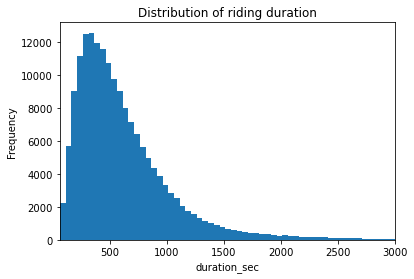

In [26]:
bins_dur=np.arange(61,bike_data['duration_sec'].max()+50,50)
plt.hist(data=bike_data, x='duration_sec', bins=bins_dur)
plt.ylabel('Frequency')
plt.xlabel('duration_sec')
plt.xlim((61,3000))
plt.title('Distribution of riding duration');

We have a long tail to the right. We use the logarithm transformation to check the distribution at the end.

In [27]:
np.log10(bike_data['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

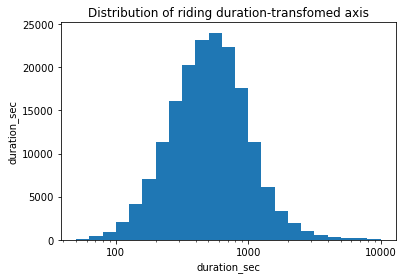

In [28]:
bins_dur=10**np.arange(1.7,4+0.1,0.1)
plt.hist(data=bike_data, x='duration_sec', bins=bins_dur)
plt.xscale('log')
plt.ylabel('duration_sec')
plt.xlabel('duration_sec')
plt.xticks([100,1000,10000],['100','1000','10000'])
plt.title('Distribution of riding duration-transfomed axis');

The duration scale is a unimodal data. The highest percentage of the riding durations and between 300 and 600 seconds. Some special cases includes 61 second ride. However, this could be for the elderly.



**Age distribution among the riders**

Next, we look at the distribution of age of the individual riders. 

In [29]:
bike_data['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

The age of the riders go beyong 100. We have highest age as 141. This is not real. In most cases, the oldest person that can ride a bike may not go beyond 80 years. Therefore, we will limit the age to 80 years old.

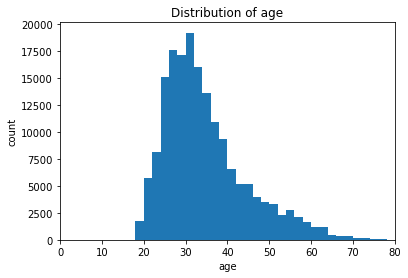

In [30]:
bins_age=np.arange(18,90+2,2)
plt.hist(data=bike_data, x='age',bins=bins_age)
plt.xlabel('age')
plt.xlim((0,80))
plt.ylabel('count')
plt.title('Distribution of age');

The highest frequncy is about 33 years.The distribution of the age that do a lot of bike riding is a unimodal. The highest percentage of bike riders are between 25 and 35 years old. Its worthy noting that we also have some riders beyond 70 years.


**Gender distribution among the riders**

We look at the distribution of gender among the riders

In [31]:
sex_counts=bike_data['member_gender'].value_counts()
sex_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

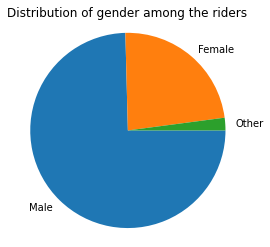

In [32]:
plt.pie(sex_counts, labels=sex_counts.index,startangle=0, counterclock=False)
plt.axis('square')
plt.title('Distribution of gender among the riders');


The highest percentage of riders are male. This comprises of more than half of the riders while the female riders are slightly less than a quarter of all the rider. The other gender are very few compared with the total number of riders.


**Type of Bike riders**

We also look at the types of bike riders

In [33]:
usertype_counts=bike_data['user_type'].value_counts()
usertype_counts

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

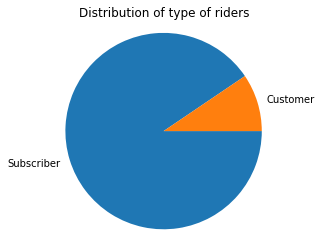

In [34]:
plt.pie(usertype_counts, labels=usertype_counts.index,startangle=0, counterclock=False)
plt.axis('square')
plt.title('Distribution of type of riders');

The majority of the riders are subscribers. Those that are not subcriber as very few; comprising of less than a quarter of all the riders. 

**Bike sharing during all the trips**

We now look at bike sharing for all the trips. 

In [35]:
bike_data['bike_share_for_all_trip'].value_counts() 

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

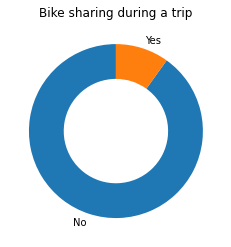

In [36]:
share_count=bike_data['bike_share_for_all_trip'].value_counts().values 
labels=bike_data['bike_share_for_all_trip'].value_counts().index
plt.pie(share_count, labels=labels,startangle=90, wedgeprops={'width':0.4})
plt.title('Bike sharing during a trip');

In more that 80% cases, the riders do not share the bike, while less than 20% share the bike during a trip. 


**Common starting points ids**

We also consider the common starting points. There are many unqiue starting points ids, therefore, we will only look the 12 most commonly used stations as starting points.

In [37]:
#first 12 common startin points
start_pointsid=bike_data['start_station_id'].value_counts()[:12]
start_pointsid

58     3649
67     3408
81     2952
21     2711
3      2620
30     2577
15     2541
22     2216
16     2191
5      2144
6      1975
239    1761
Name: start_station_id, dtype: int64

We order the bars in ascending order beginning with start station that has the highest number of riders

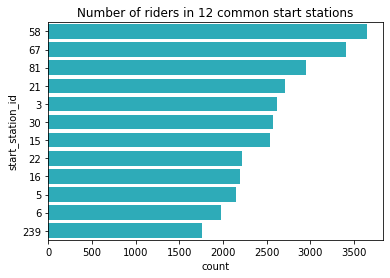

In [38]:
color1=sns.color_palette()[-1]
sns.countplot(data=bike_data, y='start_station_id',order=start_pointsid.index, color=color1);
plt.title('Number of riders in 12 common start stations');

The most common starting point is station id 58. The first 12 common starting points have more than 1500 starting incidences. We found that 12 common used starting points have heard at least 1761 starting incidences. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable of interest is the duration of riding. The distribution of the riders depicts a unimodal distribution that is skewed to the right. Most riders ride between 300 and 600 seconds. That translates to 5 minutes to 10 minutes. Due to a long tail at the right, we transformed the data to a log distribution to clearly see the distribution to the right. We found no feature of graph that was significant.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We were investigating the age, sex, bike_share, bike_share_for_all_trip, bike_id, user_type and start_station_id.
The age distribution was unimodal with the highest percentage of riders being aged between 25 and 35 years old. The were also some riders that were aged beyond 80 years. To get the age column, we subtracted the year of birth from the year of starting the ride. Therefore, we had to clean the two columns to have them years as an integer, then perform vectorised subtraction. 

Next, we investigated the gender. We only computed the pdSeries.value_counts() function which gave use the nature of the data. Then we used the piechart to get the distribution of gender. We found that about three quarters of the riders are male while the female are about a quarter. We also found a small percentage of less than 10 representing the other gender.

We also looked at the type of bike riders. We only found two types; the subscribers and the customers. More than 80% of the riders were subscribers while the customers were less than 20%. 

We also looked at the composition of riders based on those that share the bike share for all trip compared to those that do not. We find that more than 80% of the riders do not share the bike while less than 20% share the at least bike for all the trip.  

Finally, we looked the common starting points for the riders. We found that the most common point for starting is station id 58 with 3649 starting incidences. The starting points were many, as such, we only picked the first 12 points that had the highest starting incidences. We found that 12 common used starting points have heard at least 1761 starting incidences. 

On distribution of gender, we found that about three quarters of the riders are male while the female are about a quarter. We also found a small percentage of less than 10 representing the other gender.

We also looked at the  type of bike riders. We only found two type; the subscribers and the customers. We found that more than 80% of the riders are subscribers while the customers were less than 20%. 

We also looked at the composition of riders based on those that share the bike share for all trip compared to those that do not. We find that more than 80% of the riders to not share the bike while less than 20% share the at least bike for all the trip.  

Finally, we looked the common starting points for the riders. We found that the most common point for starting is station id 58 with 3649 starting incidences. The starting points were many, as such, we only picked the first 12 points that has the highest starting incidences. We found that 12 common used starting points have heard at least 1761 starting incidences. 

## Bivariate Exploration

In this section, we investigate the relationships between the riding durations and other variables such as the age, gender, user type, bike sharing and the counts of starting point ids. We will investigate two variables at ago. 

**Duration and age**

We investigate the correlation between the duration and age. We limit the age to 80 years old

In [39]:
bike_data[['age','duration_sec']].describe()

,age,duration_sec
count,174952.000000,174952.000000
mean,34.196865,704.002744
std,10.118731,1642.204905
min,18.000000,61.000000
25%,27.000000,323.000000
50%,32.000000,510.000000
75%,39.000000,789.000000
max,141.000000,84548.000000


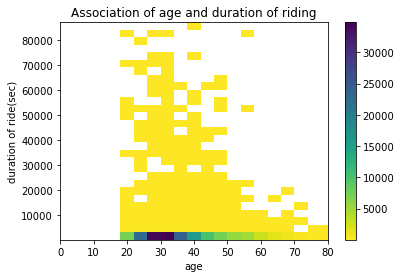

In [40]:
def heat_duration_g(ourdata,x_column,xbin_,ybin_ ):    
    plt.hist2d(data=ourdata, x=str(x_column), y='duration_sec', cmin=0.5, cmap='viridis_r', bins=[xbin_, ybin_])
    plt.xlabel(str(x_column))    
    plt.xlim((0,80))
    
    
xbins_bi=np.arange(18,80+4,4)
ybins_bi=np.arange(61,bike_data['duration_sec'].max()+3000,3000)
heat_duration_g(bike_data,'age',xbins_bi,ybins_bi)
plt.colorbar();
plt.ylabel('duration of ride(sec)')
plt.title('Association of age and duration of riding');

From the plot, we find that the majority of the riders ride for less than 5000 seconds. We also find that younger people rides much more than older ones. Furthermore, they even ride extremely longer hours comparied to older ones. We also found that older poeple rarely rides for more than 10000 seconds.


**Age and gender**

We create a plot to investigate how gender varies with age

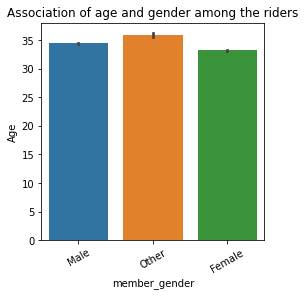

In [41]:
#Use bar plot
fig6=plt.figure(figsize=(4,4))
sns.barplot(data=bike_data, x='member_gender', y='age', estimator=np.mean)
plt.xticks(rotation=30)
plt.ylabel('Age')
plt.title('Association of age and gender among the riders');

We found that there is no significance difference in mean age among the majority of riders that are male, famele or other gender. However, we find that the other gender riders has the highest mean age followed by male and finally the ladies.

**Duration and gender**

Next, we look the comparison durations taken riding for different gender


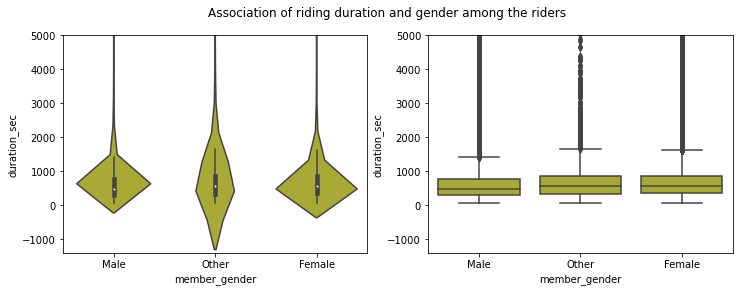

In [42]:
#function for violin plot
def violin_plot_fun(xcol,color2,ylim_lower,ylim_upper):
    sns.violinplot(data=bike_data, y='duration_sec', x=str(xcol), color=color2)
    plt.ylim((int(ylim_lower),int(ylim_upper)))

def box_plot_fun(xcol,color2,ylim_lower,ylim_upper):
    sns.boxplot(data=bike_data, y='duration_sec', x=str(xcol), color=color2)
    plt.ylim((int(ylim_lower),int(ylim_upper)))

    
#plot for for duration and member gender    
color_gender=sns.color_palette()[-2]


plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
violin_plot_fun('member_gender',color_gender,-1400, 5000)

plt.subplot(1,2,2)
box_plot_fun('member_gender',color_gender,-1400, 5000)
plt.suptitle('Association of riding duration and gender among the riders'); 




We found that the majority of the female riders takes slighly more time riding that the their male and other gender. 


**Duration and user types**

We investigate the duration of riding by different bike user types

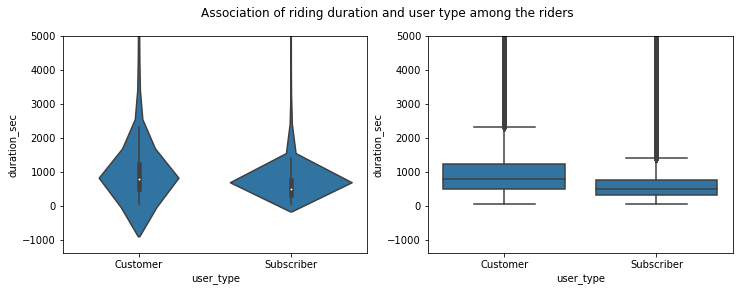

In [43]:
#plot for for duration and member gender    
color_user=sns.color_palette()[0]
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
violin_plot_fun('user_type',color_user,-1400, 5000)


plt.subplot(1,2,2)
box_plot_fun('user_type',color_user,-1400, 5000)

plt.suptitle('Association of riding duration and user type among the riders'); 



From the plots above, we find that the customers ride for longer hours than the suscribers. Further, the mean number of customers is slightly higher than that of the subscribers. 


**Duration and bike sharing during all the trips**

We also investigate the time taken by the riders for those that shared and those that do not share bikes during all the trips.

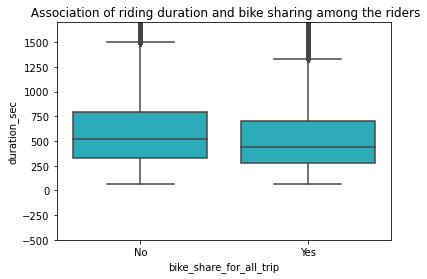

In [44]:
color_share=sns.color_palette()[-1]
box_plot_fun('bike_share_for_all_trip',color_share,-500, 1700)
plt.title(' Association of riding duration and bike sharing among the riders'); 

We find that those that do not share the bike rides for slightly longer hours compared to those that share the bikes. 


**Duration and Common starting points ids**

We only investigate the the first 12 start point ids that are common 

In [45]:
best12_ids=list(bike_data['start_station_id'].value_counts().index[:12])
best12_ids

[58, 67, 81, 21, 3, 30, 15, 22, 16, 5, 6, 239]

In [46]:
bike_data_12pts=bike_data[bike_data['start_station_id'].isin(best12_ids)]

In [47]:
bike_data_12pts['duration_sec'].describe()

count    30745.000000
mean       721.239454
std       1640.347861
min         61.000000
25%        372.000000
50%        544.000000
75%        774.000000
max      84548.000000
Name: duration_sec, dtype: float64

In [48]:
order=start_pointsid

Majority of the data sets are less than 2500, therefore, we limit the duration to up to 2500 to view the distribution.

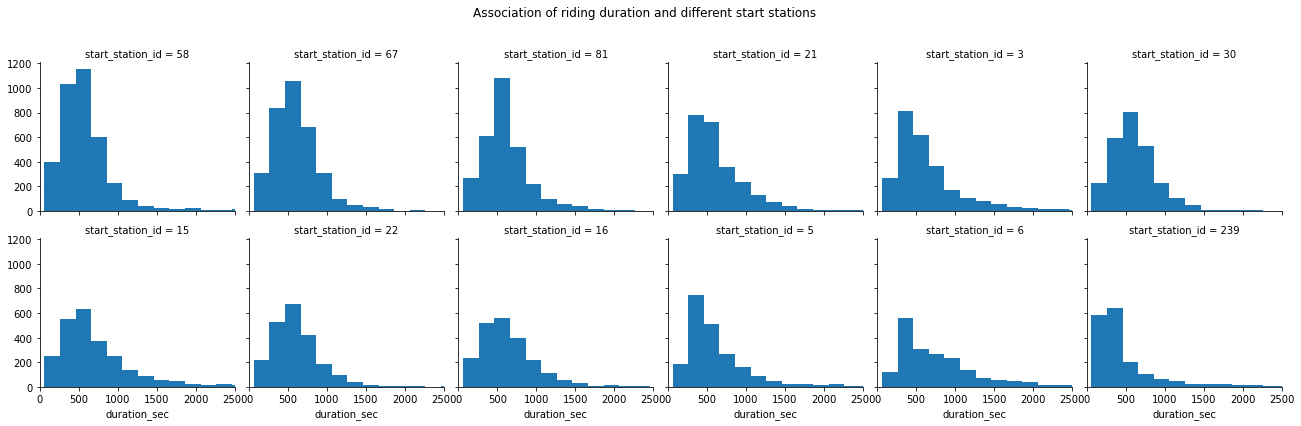

In [49]:
#first 12 common startin points  
bins_=np.arange(61,2500+200,200)
fig2=sns.FacetGrid(data=bike_data_12pts, col_order=start_pointsid.index, col='start_station_id', col_wrap=6)
fig2.map(plt.hist, 'duration_sec',bins=bins_)
plt.xlim((0,2500))
fig2.fig.subplots_adjust(top=0.85)
fig2.fig.suptitle('Association of riding duration and different start stations'); 

The starting id stations are arranged in order from those that have the largest count of starting incidences to the least among the 12 best stations that have the highest number of starting incidences. 

We find that the majority of the starting points having the largest amount of least points have one of the largest durations taken by the riders. The riders who began from the most common starting points rode very long hours as compared to those whose rode for long hours from the least common starting points. The first three most common starting point ids have quite large durations but the remaining ones decrease by a significant magin, from between 1000 to 1200 seconds to between 600 and 900 seconds and finally from 400 to 700 seconds. However, the third least station, station id 5, has slighlt higher riding durations that last 6.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this section, our interest was on how duration od rifing varies with respect to other variables. When investgating duration and age, we found that the majority of the riders ride for less than 10000 seconds. We also found that the younger people rides much more than older ones. Further more, they even ride extremely longer hours comparied to older ones. We also found that older poeple rarely rides for more than 10000 seconds. Those that are more than 50 years hardly rides for longer hours.

When investigating duration and gender distribution, we found that on in general female riders takes slighly more time riding that the male and other gender.

When investigating the duration and the user types, we found that the customers rides longer than the subscribers. On the other hand, we found that the riders that do not share the bike rides for longer hours than those that shares the bike. 

Finally, while investigating the duration of riding in relation to different 12 major starting points, we found that the majority of the starting points having the largest amount of least points have the largest durations taken by the riders. The riders who began from the most common starting points rode for long hours as compared to those that began from the least common starting points. The first three most common starting point ids have quite large durations but the remaining ones decrease by a significant magin, from between 1000 to 1200 seconds to between 600 and 900 seconds and finally from 400 to 700 seconds. However, the third least station, station id 5, has slighlt higher riding durations that last 6.






### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We only investigated the relationship between age and gender. We found that there is no significance difference in mean age among the majority of riders that are male, famele or other gender. However, we find that the other gender riders has the highest mean age followed by male and finally the ladies.

## Multivariate Exploration

In this section, we investigate the relationships between the riding durations and other variables such as the age, gender, user type, bike sharing and the counts of starting point ids. We will investigate three or more variables at ago.

**Duration, age and gender**

In [50]:
bike_data['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [51]:
#create data frames for different genders
bike_data_male=bike_data[bike_data['member_gender']=='Male']
bike_data_female=bike_data[bike_data['member_gender']=='Female']
bike_data_other=bike_data[bike_data['member_gender']=='Other']

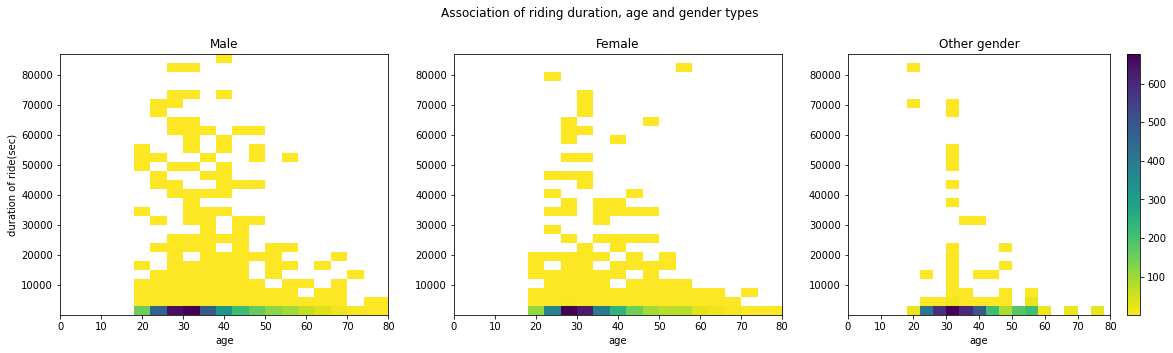

In [52]:
xbins_mul=np.arange(18,80+4,4)
ybins_mul=np.arange(61,bike_data['duration_sec'].max()+3000,3000)

#We use the function for heatmap defined above

fig3 =plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
heat_duration_g(bike_data_male,'age',xbins_mul,ybins_mul)
plt.title('Male')
plt.ylabel('duration of ride(sec)')

plt.subplot(1,3,2)
heat_duration_g(bike_data_female,'age',xbins_mul,ybins_mul)
plt.title('Female') 

plt.subplot(1,3,3)
heat_duration_g(bike_data_other,'age',xbins_mul,ybins_mul)
plt.title('Other gender')
plt.colorbar()

plt.subplots_adjust(top=0.85)
plt.suptitle('Association of riding duration, age and gender types') ;


There are more yellow squares in the male plot followed by the female and finally the other plot. The highest density of the plots is between 20 and 50. This implies that more male riders between the age of 20 and 50 rides more than their female and other gender. The density square fades as we move to the right of each curve implying that more male between 20 and 50 rides compared to female and other gender rides especially. The least is appears in the other gender.  

We also  see darker colors below 10000 mark for all the graphs implying that there majority of riders do it for less than 10000 or 5000 seconds to be precise. The happens in all the gender categories. 

We also notice that below the 10000 duration mark, slightly darker color between 50 and 60 for other gender than the other two. This implies that among the riders that rides for less than 10000 seconds, more adults in the other gender rides more than the male and famele counterpart.

**Duration, age and user type**

In [53]:
bike_data['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [54]:
#create data frames for different user types
bike_data_Subscriber=bike_data[bike_data['user_type']=='Subscriber']
bike_data_Customer=bike_data[bike_data['user_type']=='Customer']

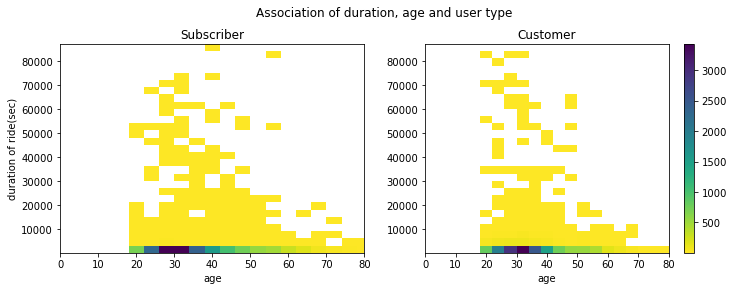

In [55]:
#We use the function for heatmap defined above

fig3 =plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
heat_duration_g(bike_data_Subscriber,'age',xbins_mul,ybins_mul)
plt.title('Subscriber')
plt.ylabel('duration of ride(sec)')

plt.subplot(1,2,2)
heat_duration_g(bike_data_Customer,'age',xbins_mul,ybins_mul)
plt.title('Customer')

plt.colorbar()
plt.subplots_adjust(top=0.85)
plt.suptitle('Association of duration, age and user type') ;

The subscriber's graph has more data points below 10000 mark as well as above 10000. This implies that within a specific age, for instance, 20 to 45 years, there are more subscriber riders than customers. Furthermore, the most subscribers rides for long hours than the customers. Between the age of about 25 to 35 years, we have the majority of subscribers than the customer riders.


**Duration, age and bike sharing during all the trips**

In [56]:
bike_data['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [57]:
#create data frames for different user types
bike_data_Share_n=bike_data[bike_data['bike_share_for_all_trip']=='No']
bike_data_Share_y=bike_data[bike_data['bike_share_for_all_trip']=='Yes']

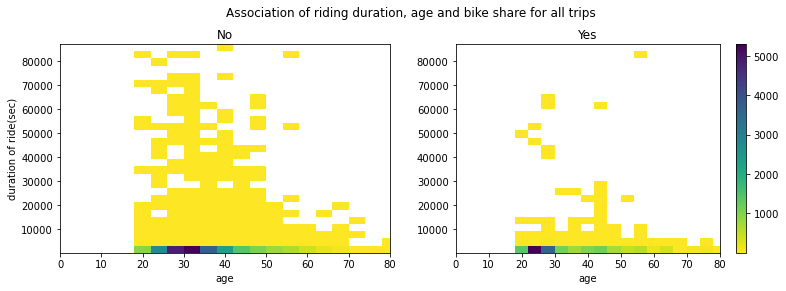

In [58]:
#We use the function for heatmap defined above

fig3 =plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
heat_duration_g(bike_data_Share_n,'age',xbins_mul,ybins_mul)
plt.title('No')
plt.ylabel('duration of ride(sec)')

plt.subplot(1,2,2)
heat_duration_g(bike_data_Share_y,'age',xbins_mul,ybins_mul)
plt.title('Yes')

plt.colorbar()
plt.subplots_adjust(top=0.85)
plt.suptitle('Association of riding duration, age and bike share for all trips') ;

In the plot above, we find that in general, across all ages, we have fewer riders sharing bikes than those that do not share. However, the majority are between about 21 and 30 years old. Among those that do not share, we have the majority of riders being above 30 years old while the majority of those that share are below 25 years old.

**Duration, gender and bike sharing during all the trips**

Text(0.5, 1.0, 'Association of riding duration, gender and bike sharing among the riders')

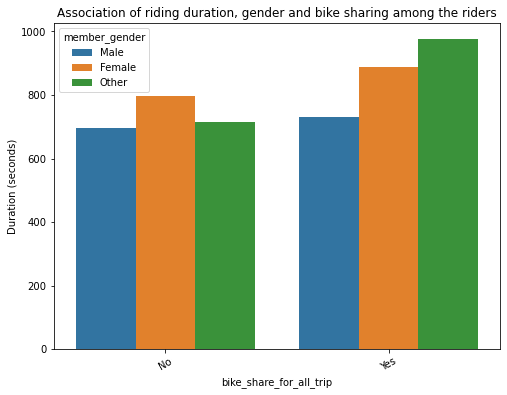

In [59]:
#Use bar plot
fig6=plt.figure(figsize=(8,6))
sns.barplot(data=bike_data_12pts, x='bike_share_for_all_trip', y='duration_sec',hue='member_gender', ci=0, estimator=np.mean)
plt.xticks(rotation=30)
plt.ylabel('Duration (seconds)');
plt.title('Association of riding duration, gender and bike sharing among the riders') 

From the graph above, we find that among the male is the lowest gender category that both shared and do not share a bike. The other gender has the highest everage riding hours among the riders that share the bike while this is less than the corresponding category among those that do not share a bike. On the other hand, among those that do not share a bike, the female has the highest mean while their number is smaller compared to the female tat share the bike. 

**Duration, user type and Common starting station ids**

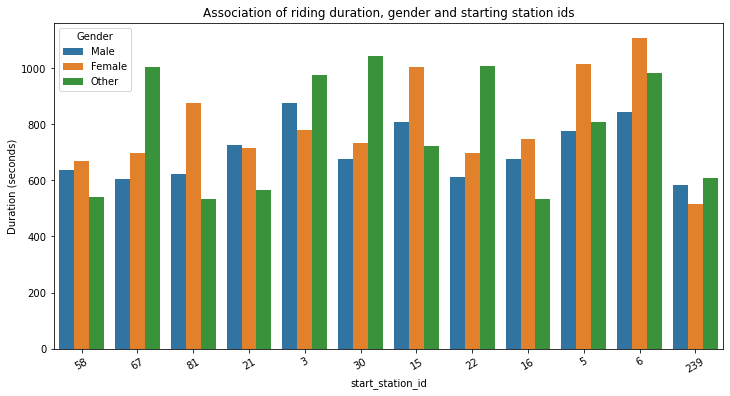

In [60]:
#Use clusted bar plot
fig6=plt.figure(figsize=(12,6))
sns.barplot(data=bike_data_12pts, x='start_station_id', y='duration_sec',hue='member_gender', ci=0, order=best12_ids)
plt.xticks(rotation=30)
plt.ylabel('Duration (seconds)')
plt.title('Association of riding duration, gender and starting station ids') 
plt.legend(title='Gender');

From the plot, the male riders rides for a shorter period for almost all the starter stations while the other gender has the highest number of durations across almost all starting stations. It is also evident that despite station 58 being one that have the highest number of riders, it has the lowest average riding duration across all the 12 stations. This implies that the majority of the riders from the station must be riding for shorter periods of time. In general, start stations having the highest number of starting riders do not have higher average riding durations. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the plots, we have found that the more male riders between the age of 20 and 50 rides more than their female and other gender. the highest number of riders across all gender are rides for less than 10000 seconds. We also found that between 50 and 60 years, we have more other gender riding for less than 10000 than the males and females.  
We also found that within the most riding age group, we have more subscribers than the custmers riders.

We have also found that across all ages, we have fewer riders sharing bikes than those that do not share. However, the majority are between about 21 and 30 years old. Among those that do not share, we have the majority of riders being above 30 years od while the majority of those that share are below 25 years old.

Finally, we have found that the male riders rides for a shorter period for almost all the starter stations while the other gender has the highest number of durations across almost all starting stations. It is also evident that despite station 58 being one that have the highest number of riders, it has the lowest average riding duration across all the 12 stations. This implies that the majority of the riders from the station must be riding for shorter periods of time. 


### Were there any interesting or surprising interactions between features?
The most interesting feature was that the male, despite being known to be masculine and more energetic than the other genders, rides for averagely shorter period than the female and the other gender. 
Another interesting feature that the start stations that has most riders do not have the highest averaging riding duration. However, most riders go for a shorter time compared to the other 11 most common starting points.


## Conclusions


We analysed the Ford bike data using visualizations. The visualizations were univariate, bivariate and also multivariate. 
We bagan with univarate visualizations. We found that most rider rides between 300 and 600 seconds. These were mainly the age group between 25 and 35 years. In addition, we found that about three quarter of the riders are male while the female were almost equal to a quarter of all the riders. We also have the other gender whose percetage was less than 10%.
We also established that there were two types of riders, the subscriber and the customers where the subscribers were composed of about 80% of all the riders. During the riding there are riders that shared the bike and those that did not. We found that those that share the bike were about 80% of the riders. We also establashed that there were 12 common starting stations whith the highest having 3649 riders and the twelfth one having 1761 riders.

Next, we looked at the association of two variable, different variable and the riding duration. We found that across all ages, most riders rode for less than 10000 seconds with the male between 25 and 35 being the majority. This is the most riding age group. On the other hand, the Customers were the user type that rode for longer time than the subscribers. Furthermore, the riders that rode for longer hours are those that did not share the bike. We established that the most common starting stations had very long riding hours compared to the longest hours attained by those in least common stations.

Finally, we also looked at associations having three variables. We found that the more male riders between the age of 20 and 50 rode more than the female and other gender. The highest number of riders across all gender are rode for less than 5000 seconds. We also found that between 50 and 60 years, we have more other gender riding for less than 5000 than the males and females. We also found that within the most riding age group, we have more subscribers than the customers riders.

While considering bike sharing, we found that across all ages, we had fewer riders sharing bikes than those that did not share the bike, however, the majority were between about 21 and 30 years old. Among those that did not sharea bike, we had the majority of riders being above 30 years old while the majority of those that share are below 25 years old.

While looking starter stations, we found that the male riders rode for a shorter period while the other gender has the highest number of durations across almost all starting stations. It was also evident that despite station 58 being one that had the highest number of riders, it had the lowest average riding duration across all the 12 stations. This implied that the majority of the riders from the station must have been riding for shorter periods of time. 

The most interesting feature was that on average, the male rode for a shorter period than the female and the other gender. This is against the expectation because male are expected to ride for longer than female given their masculinity. Another interesting points that the common start has long riding hours but on evarage, it has the shortest riding hours. This implied that short time riders used the station leading to the low average.